### This is a file for taking a few images of real people and cropping them for use in models

In [3]:
%matplotlib inline
import numpy as np
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean

In [4]:
alexHQ=io.imread('custom_images/DimakisHighQuality.png')
sriramHQ=io.imread('custom_images/VishwanathHighQuality.jpg')

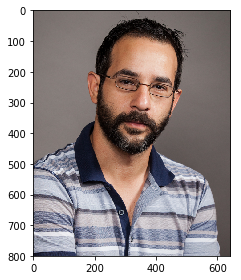

In [9]:
io.imshow(alexHQ)

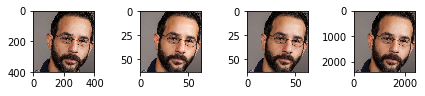

In [44]:
#custom_crop

#PARAMS
tl=[50,90]
w=400

img=alexHQ
br=[tl[0]+w,tl[1]+w]
crop=img[tl[0]:br[0],tl[1]:br[1]]
float_img64=resize(crop,[64,64],mode='reflect',preserve_range=True)
img64=float_img64.round().astype(np.uint8)
resca64=rescale(crop,w/64)
#io.imshow(crop)
io.imshow_collection([crop,float_img64/float_img64.max(),img64,resca64])

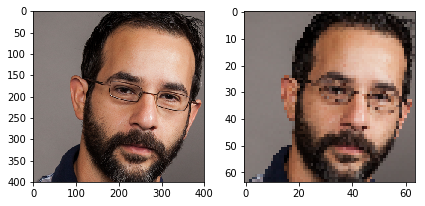

In [47]:
io.imshow_collection([crop,img64])

In [39]:
crop.shape

(400, 490, 3)

In [28]:
resize?

In [6]:
#Evaluate effect of cropping:
#code taken from began and dgan data loading
import tensorflow as tf

In [17]:
alexHQ.shape

(800, 643, 3)

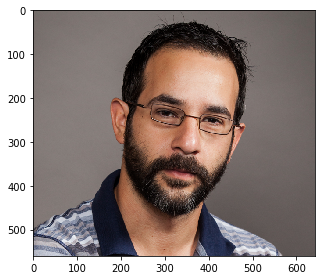

In [22]:
io.imshow(alexHQ[:560])

In [36]:
#DCGAN
from utils import transform
from utils import center_crop

In [43]:
alex_sq=alexHQ[:560]

tl=[50,90]
w=400
img=alexHQ
br=[tl[0]+w,tl[1]+w]

dcout=center_crop(alex_sq,br[0]-tl[0],br[1]-tl[1],64,64)#scipy.misc.resize

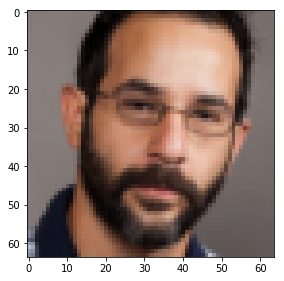

In [44]:
io.imshow(dcout)

In [46]:
#BEGAN
image=tf.constant(alex_sq)

scale_size=64
f_image=tf.cast(image,dtype=tf.float32)

#if is crop:yes
#dcgan center-crops input to 108x108, outputs 64x64 #centrally crops it

rz_image=tf.image.resize_image_with_crop_or_pad(f_image,br[0]-tl[0],br[1]-tl[1])
#rz_image=tf.image.resize_image_with_crop_or_pad(f_image,108,108)

#image=tf.image.resize_bilinear(image,[scale_size,scale_size])#must be 4D
image64=tf.image.resize_images(rz_image,[scale_size,scale_size],
        method=tf.image.ResizeMethod.BILINEAR)
final_image=tf.image.random_flip_left_right(image)


s=tf.Session()

In [47]:
im,f_im,rz_im,im64,final_im=s.run([image,f_image,rz_image,image64,final_image])

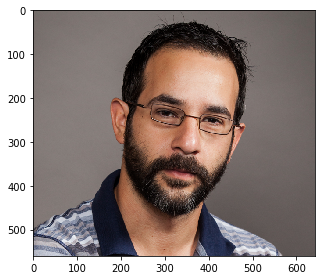

In [48]:
io.imshow(im)

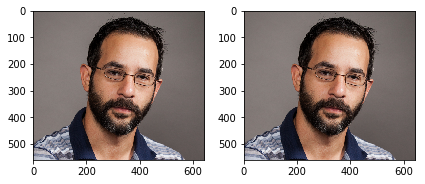

In [49]:
io.imshow_collection([im,f_im/f_im.max()])

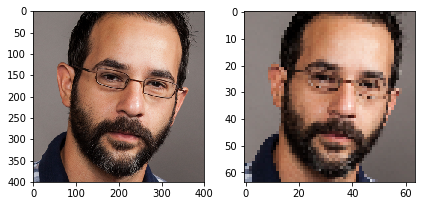

In [50]:
io.imshow_collection([rz_im/rz_im.max(),im64/im64.max()])

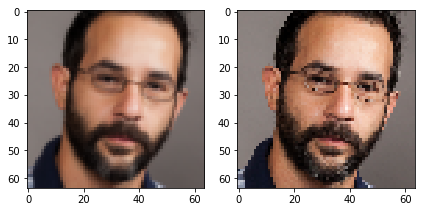

In [51]:
io.imshow_collection([dcout,im64/im64.max()])